In [72]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

In [10]:
df = pd.read_csv('./train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
df.fillna(df.mean(), inplace=True)

In [33]:
X = df.drop(columns='Survived')
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [32]:
trf_age = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
trf_fare = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

In [31]:
trf_fare.fit_transform(df[['Age']])

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [59]:
# without encoding numerical values

np.random.seed(42)

dt = DecisionTreeClassifier()
lr = LogisticRegression()

dt.fit(X_train, y_train)
lr.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_pred_lr = lr.predict(X_test)

acc_dt = accuracy_score(y_pred_dt, y_test)
acc_lr = accuracy_score(y_pred_lr, y_test)

cv_score_dt = cross_val_score(estimator=dt, X=X, y=y, scoring='accuracy')
cv_score_lr = cross_val_score(estimator=lr, X=X, y=y, scoring='accuracy')

print(f'''
ACCURACY:

Decision Tree Classifier : 
Accuracy : {acc_dt}
Mean cross val score : {np.mean(cv_score_dt)}

Logistic Regression :
Accuracy score : {acc_lr}
Mean cross val score : {np.mean(cv_score_lr)}
''')


ACCURACY:

Decision Tree Classifier : 
Accuracy : 0.695067264573991
Mean cross val score : 0.644234511330111

Logistic Regression :
Accuracy score : 0.6636771300448431
Mean cross val score : 0.6588726382524637



In [140]:
# with transformation

trf_age = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='ordinal')
trf_fare = KBinsDiscretizer(n_bins=10, strategy='quantile', encode='ordinal')

ct = ColumnTransformer([
    ('trf_age', trf_age, ['Age']),
    ('trf_fare', trf_fare, ['Fare'])
])

X_transformed = ct.fit_transform(X)
X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)

dt = DecisionTreeClassifier()
lr = LogisticRegression()

dt.fit(X_train_transformed, y_train)
lr.fit(X_train_transformed, y_train)

y_pred_dt = dt.predict(X_test_transformed)
y_pred_lr = lr.predict(X_test_transformed)

acc_dt = accuracy_score(y_pred_dt, y_test)
acc_lr = accuracy_score(y_pred_lr, y_test)

cv_score_dt = cross_val_score(estimator=dt, X=X, y=y, scoring='accuracy')
cv_score_lr = cross_val_score(estimator=lr, X=X, y=y, scoring='accuracy')

print(f'''
ACCURACY:

Decision Tree Classifier : 
Accuracy : {acc_dt}
Mean cross val score : {np.mean(cv_score_dt)}

Logistic Regression :
Accuracy score : {acc_lr}
Mean cross val score : {np.mean(cv_score_lr)}
''')


ACCURACY:

Decision Tree Classifier : 
Accuracy : 0.6457399103139013
Mean cross val score : 0.6453643839055928

Logistic Regression :
Accuracy score : 0.695067264573991
Mean cross val score : 0.6588726382524637



In [141]:
X_transformed = pd.DataFrame(X_transformed, columns=X.columns)

pd.DataFrame({
    'Age' : X['Age'],
    'Age Transformed' : X_transformed['Age'],
    'Fare' : X['Fare'],
    'Fare Transformed' : X_transformed['Fare']
}).sample(10)

,Age,Age Transformed,Fare,Fare Transformed
217,42.000000,5.0,27.0000,7.0
126,29.699118,3.0,7.7500,1.0
473,23.000000,2.0,13.7917,4.0
775,18.000000,2.0,7.7500,1.0
749,31.000000,3.0,7.7500,1.0
291,19.000000,2.0,91.0792,9.0
888,29.699118,3.0,23.4500,6.0
848,28.000000,3.0,33.0000,7.0
402,21.000000,2.0,9.8250,3.0
207,26.000000,3.0,18.7875,5.0


In [125]:
def predict(strategy, bins):

    trf_age = KBinsDiscretizer(n_bins=bins, strategy=strategy, encode='ordinal')
    trf_fare = KBinsDiscretizer(n_bins=bins, strategy=strategy, encode='ordinal')
    
    ct = ColumnTransformer([
        ('trf_age', trf_age, ['Age']),
        ('trf_fare', trf_fare, ['Fare'])
    ])
    
    X_transformed = ct.fit_transform(X)
    X_train_transformed = ct.fit_transform(X_train)
    X_test_transformed = ct.transform(X_test)
    
    dt = DecisionTreeClassifier()
    lr = LogisticRegression()
    
    dt.fit(X_train_transformed, y_train)
    lr.fit(X_train_transformed, y_train)
    
    y_pred_dt = dt.predict(X_test_transformed)
    y_pred_lr = lr.predict(X_test_transformed)
    
    acc_dt = accuracy_score(y_pred_dt, y_test)
    acc_lr = accuracy_score(y_pred_lr, y_test)
    
    cv_score_dt = cross_val_score(estimator=dt, X=X, y=y, scoring='accuracy')
    cv_score_lr = cross_val_score(estimator=lr, X=X, y=y, scoring='accuracy')
    
    print(f'''
    ACCURACY:
    
    Decision Tree Classifier : 
    Accuracy : {acc_dt}
    Mean cross val score : {np.mean(cv_score_dt)}
    
    Logistic Regression :
    Accuracy score : {acc_lr}
    Mean cross val score : {np.mean(cv_score_lr)}
    ''')

    # plotting before and after

    X_transformed = pd.DataFrame(X_transformed, columns=X.columns)

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

    sns.histplot(data=X, x='Age', fill=True, ax=ax[0,0], bins=10)
    ax[0,0].set_title('Age Before')
    sns.histplot(data=X_transformed, x='Age', fill=True, ax=ax[0,1], color='red')
    ax[0,1].set_title('Age After')
    sns.histplot(data=X, x='Fare', fill=True, ax=ax[1,0], bins=10)
    ax[1,0].set_title('Fare Before')
    sns.histplot(data=X_transformed, x='Fare', fill=True, ax=ax[1,1], color='red')
    ax[1,1].set_title('Fare After')


    ACCURACY:
    
    Decision Tree Classifier : 
    Accuracy : 0.6771300448430493
    Mean cross val score : 0.6431171928943569
    
    Logistic Regression :
    Accuracy score : 0.6860986547085202
    Mean cross val score : 0.6588726382524637
    


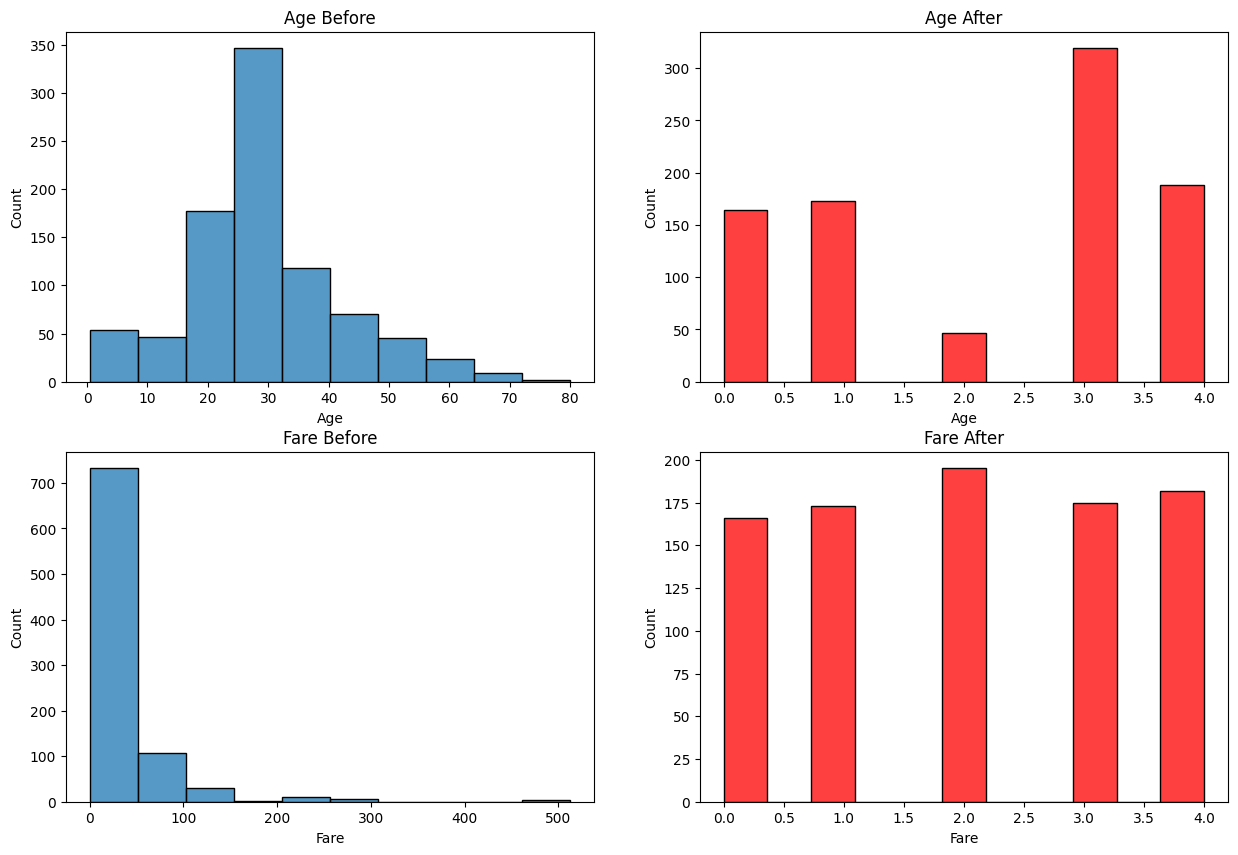

In [106]:
predict('quantile', 5)


    ACCURACY:
    
    Decision Tree Classifier : 
    Accuracy : 0.6278026905829597
    Mean cross val score : 0.647611574916829
    
    Logistic Regression :
    Accuracy score : 0.6233183856502242
    Mean cross val score : 0.6588726382524637
    


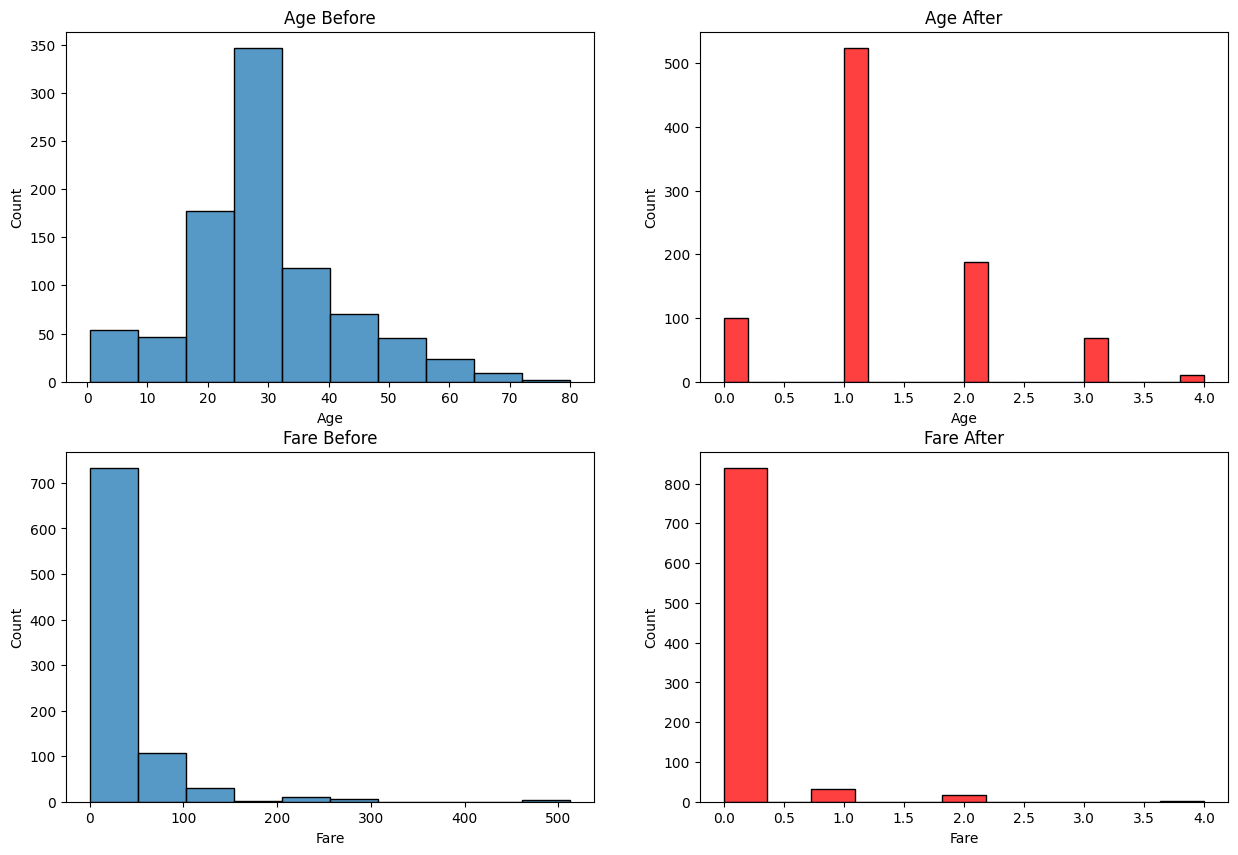

In [113]:
predict('uniform', 5)